## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 2. Loading datasets

In [2]:
df = pd.read_csv("/Users/sonamchoki/Desktop/PRJ303/seattle_weather.csv", index_col= "date")
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [3]:
np.unique(df['weather'])

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

In [3]:
df["2013-06-01":"2013-09-01"]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2013-06-01,0.0,22.8,12.2,2.5,sun
2013-06-02,1.0,20.6,12.2,3.1,rain
2013-06-03,0.0,22.2,11.1,2.9,sun
2013-06-04,0.0,26.1,12.2,3.4,sun
2013-06-05,0.0,26.7,14.4,3.1,sun
...,...,...,...,...,...
2013-08-28,5.6,26.7,15.6,1.3,rain
2013-08-29,19.3,23.9,18.3,3.0,rain
2013-08-30,0.0,26.1,16.1,2.9,sun


In [4]:
df.shape

(1461, 5)

In [5]:
df.count()

precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

## 3. Cleaning Datasets

In [6]:
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)

In [10]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [11]:
df[df['temp_max'] == df['temp_max'].max()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2014-08-11,0.5,35.6,17.8,2.6,rain


In [12]:
df[df['temp_max'] > 33.5]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-08-04,0.0,33.9,16.7,3.7,sun
2012-08-05,0.0,33.9,17.8,1.9,sun
2012-08-16,0.0,34.4,18.3,2.8,sun
2013-06-30,0.0,33.9,17.2,2.5,sun
2013-09-11,0.0,33.9,16.1,2.4,sun
2014-07-01,0.0,34.4,15.6,3.5,sun
2014-08-11,0.5,35.6,17.8,2.6,rain
2015-07-02,0.0,33.9,17.8,3.4,sun
2015-07-19,0.0,35.0,17.2,3.3,sun


In [13]:
df[df['temp_max'] == df['temp_max'].min()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2014-02-06,0.0,-1.6,-6.0,4.5,sun


### Label Encoding

In [14]:
ladel_encoding = preprocessing.LabelEncoder()
ladel_encoding.fit(df[['weather']])
new_y = ladel_encoding.transform(df[['weather']])

/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Label Encoding Map = { 'drizzle' : 0, 'fog' : 1, 'rain' : 2, 'snow' : 3, 'sun' : 4}

In [15]:
new_y

array([0, 2, 2, ..., 1, 4, 4])

In [16]:
new_ydf = pd.DataFrame(data=new_y, columns=['weather'], index = df.index)
new_ydf

,weather
date,
2012-01-01,0
2012-01-02,2
2012-01-03,2
2012-01-04,2
2012-01-05,2
...,...
2015-12-27,2
2015-12-28,2
2015-12-29,1


In [17]:
df.iloc[:,:-1]

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9
2015-12-28,1.5,5.0,1.7,1.3
2015-12-29,0.0,7.2,0.6,2.6


In [18]:
new_df = pd.concat([df.iloc[:,:-1],new_ydf],axis=1)
new_df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,0
2012-01-02,10.9,10.6,2.8,4.5,2
2012-01-03,0.8,11.7,7.2,2.3,2
2012-01-04,20.3,12.2,5.6,4.7,2
2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,2
2015-12-28,1.5,5.0,1.7,1.3,2
2015-12-29,0.0,7.2,0.6,2.6,1


In [19]:
df[['weather']]

,weather
date,
2012-01-01,drizzle
2012-01-02,rain
2012-01-03,rain
2012-01-04,rain
2012-01-05,rain
...,...
2015-12-27,rain
2015-12-28,rain
2015-12-29,fog


## EDA - Exploratory Data Analysis

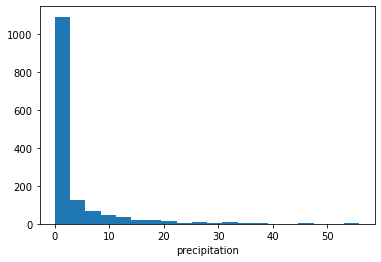

In [20]:
plt.hist(new_df.precipitation,bins=20)
plt.xlabel("precipitation")
plt.show()

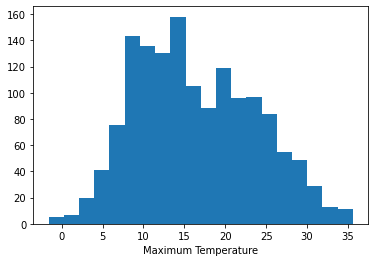

In [21]:
plt.hist(new_df.temp_max,bins=20)
plt.xlabel("Maximum Temperature")
plt.show()

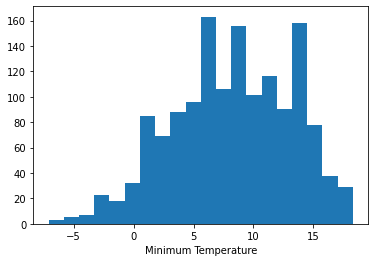

In [22]:
plt.hist(new_df.temp_min,bins=20)
plt.xlabel("Minimum Temperature")
plt.show()

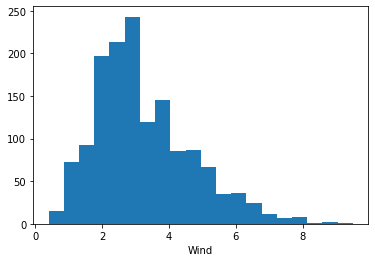

In [23]:
plt.hist(new_df.wind,bins=20)
plt.xlabel("Wind")
plt.show()

<AxesSubplot:xlabel='date'>

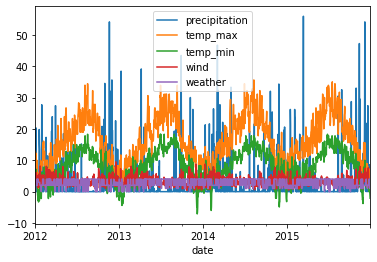

In [24]:
new_df.plot()

<AxesSubplot:xlabel='date'>

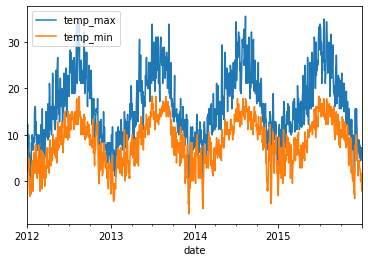

In [25]:
new_df[["temp_max","temp_min"]].plot()

In [26]:
corr = new_df.corr()
corr

,precipitation,temp_max,temp_min,wind,weather
precipitation,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather,-0.267388,0.322337,0.154981,-0.065858,1.000000


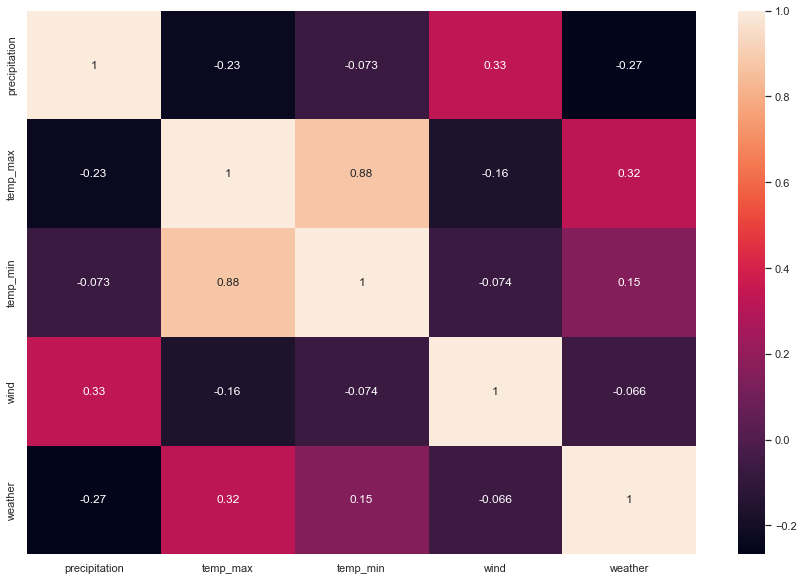

In [27]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

### Outliners Dectection

<AxesSubplot:xlabel='precipitation'>

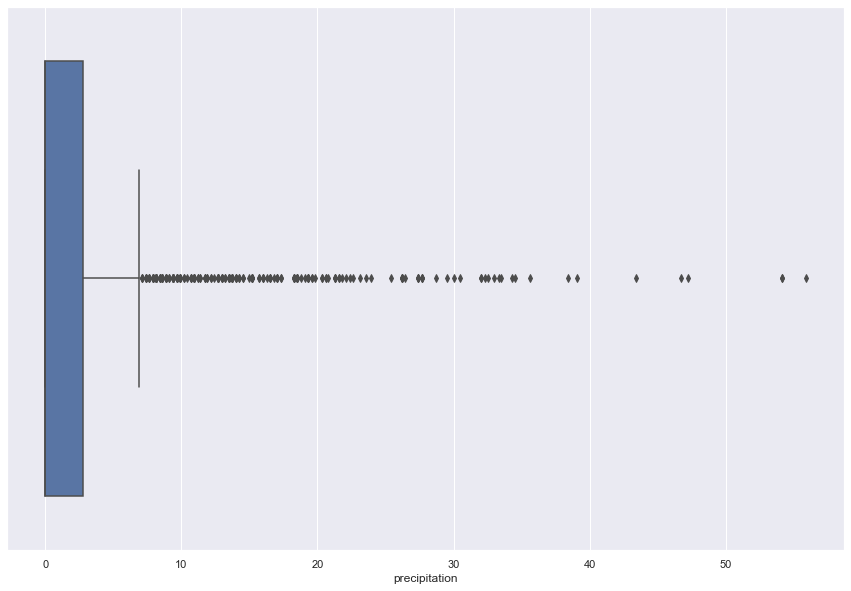

In [28]:
sns.boxplot(x=new_df['precipitation'])

### Removing outliners using IQR for precipitation

In [29]:
Q1 = new_df.precipitation.quantile(0.25)
Q3 = new_df.precipitation.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print(upperlimit,lowerlimit)

6.999999999999999 -4.199999999999999


In [30]:
new_df[(new_df.precipitation < lowerlimit)  | (new_df.precipitation > upperlimit)]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,2
2012-01-04,20.3,12.2,5.6,4.7,2
2012-01-17,8.1,3.3,0.0,5.6,3
2012-01-18,19.8,0.0,-2.8,5.0,3
2012-01-19,15.2,-1.1,-2.8,1.6,3
...,...,...,...,...,...
2015-12-12,16.0,8.9,5.6,5.6,2
2015-12-17,21.8,6.7,3.9,6.0,2
2015-12-18,18.5,8.9,4.4,5.1,2


In [31]:
newdf = new_df[(new_df.precipitation > lowerlimit) & (new_df.precipitation < upperlimit)]
newdf.shape

(1255, 5)

<AxesSubplot:xlabel='precipitation'>

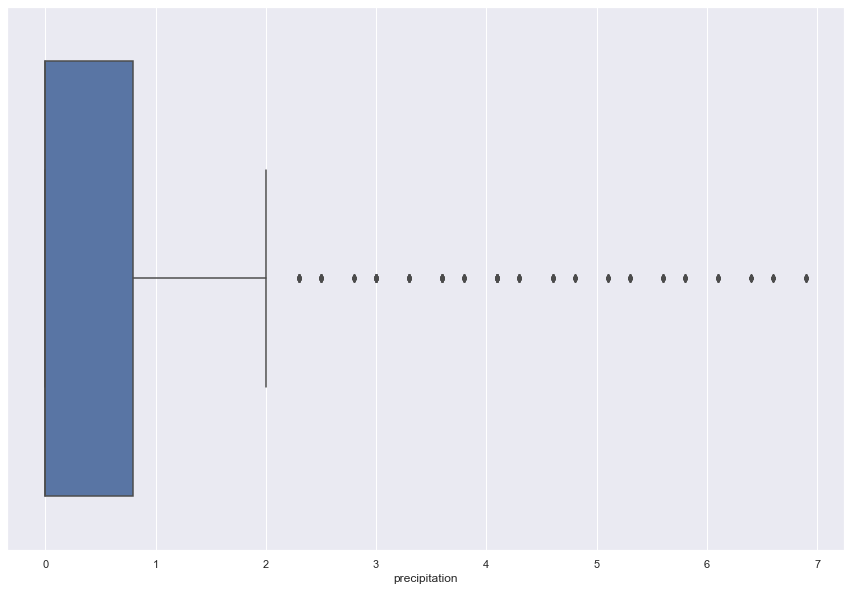

In [32]:
sns.boxplot(x=newdf['precipitation'])

<AxesSubplot:xlabel='temp_max'>

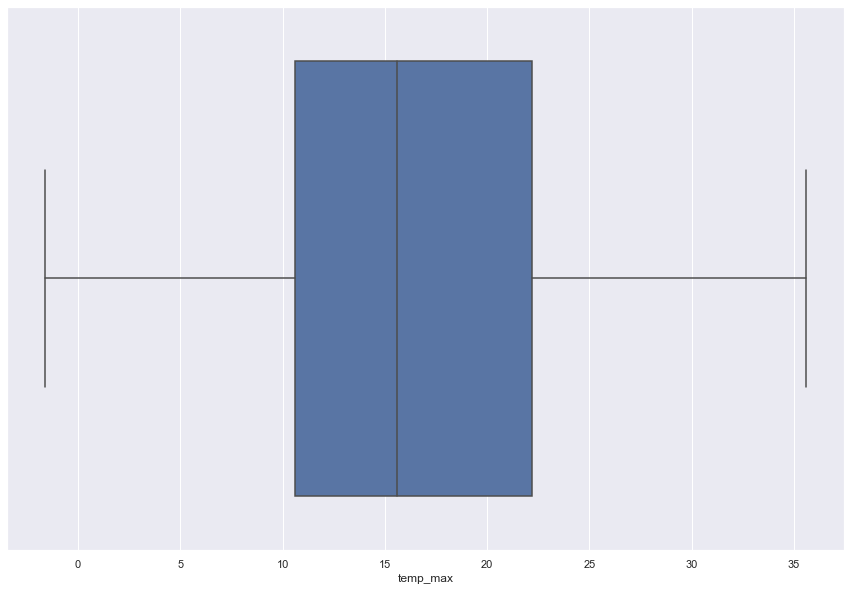

In [33]:
sns.boxplot(x=new_df['temp_max'])

<AxesSubplot:xlabel='temp_min'>

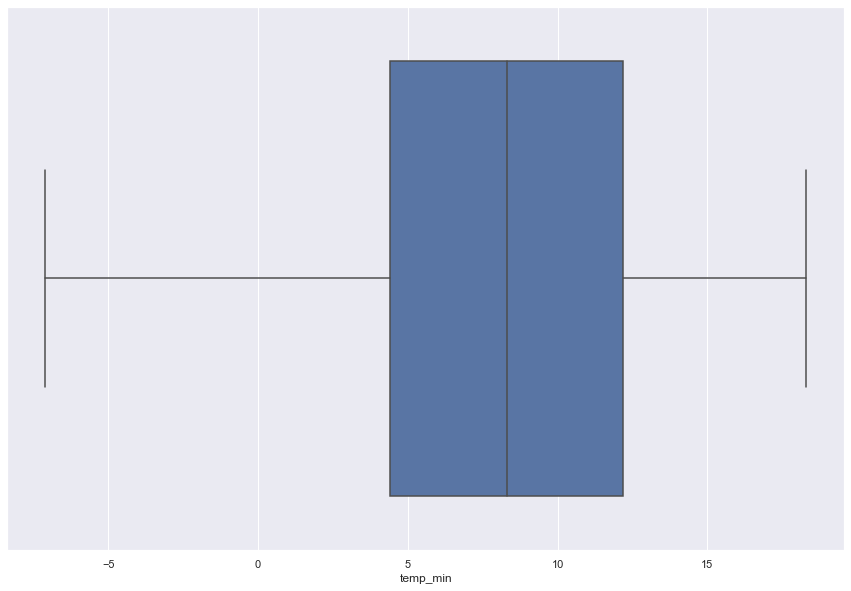

In [34]:
sns.boxplot(x=new_df['temp_min'])

<AxesSubplot:xlabel='wind'>

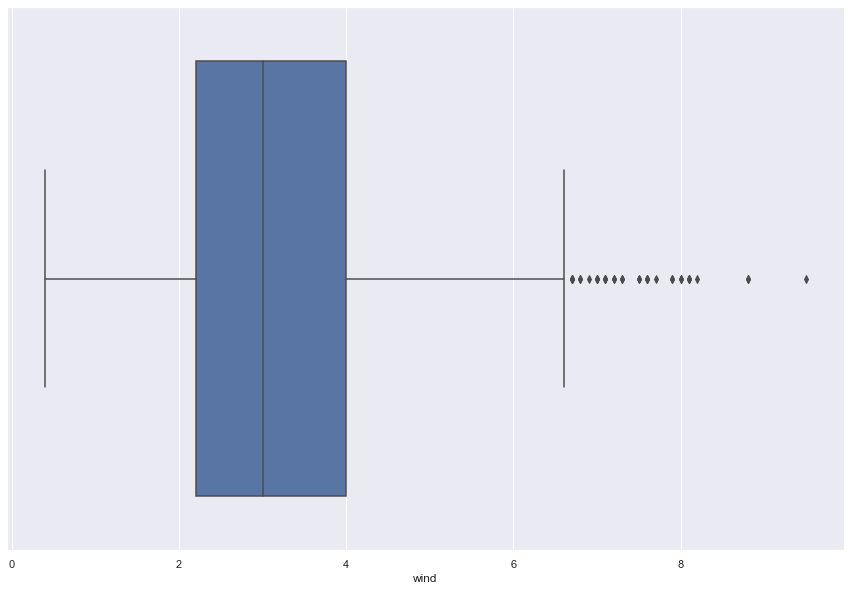

In [35]:
sns.boxplot(x=new_df['wind'])

### Removing outliners using IQR for wind

In [36]:
Q1 = new_df.wind.quantile(0.25)
Q3 = new_df.wind.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print(upperlimit,lowerlimit)

6.699999999999999 -0.49999999999999956


In [37]:
new_df[(new_df.wind < lowerlimit)  | (new_df.wind > upperlimit)]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-21,3.0,8.3,3.3,8.2,2
2012-02-18,6.4,6.7,3.9,8.1,2
2012-02-21,0.8,10.0,7.8,7.5,2
2012-02-29,0.8,5.0,1.1,7.0,3
2012-03-03,0.0,12.2,6.7,7.0,4
2012-04-01,1.5,8.9,4.4,6.8,2
2012-04-30,4.3,12.8,7.2,8.0,2
2012-10-03,0.0,18.9,7.8,7.3,4
2012-12-17,2.0,8.3,1.7,9.5,2


In [38]:
newdf = new_df[(new_df.wind > lowerlimit) & (new_df.wind < upperlimit)]
newdf.shape

(1427, 5)

<AxesSubplot:xlabel='wind'>

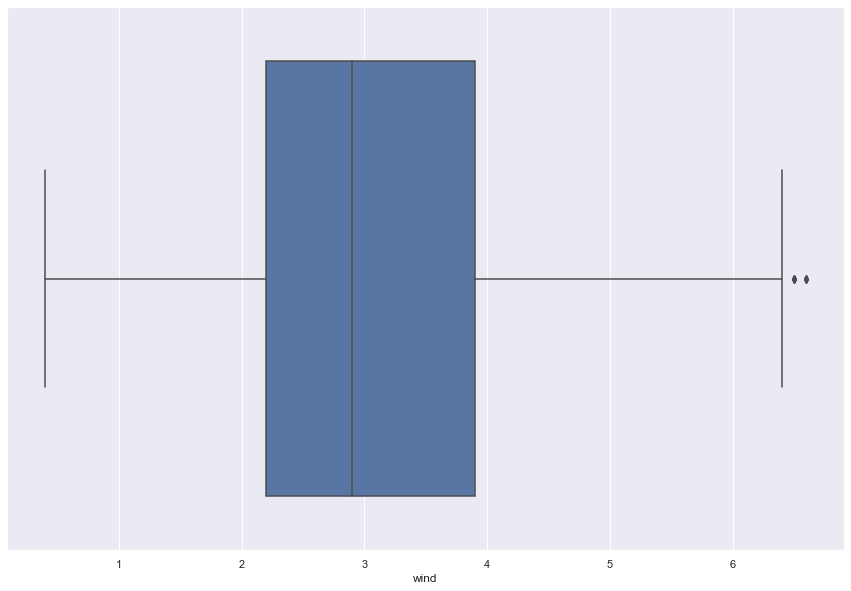

In [39]:
sns.boxplot(x=newdf['wind'])

## Spliting data

In [40]:
X = newdf.iloc[:,:-1]
y = newdf.iloc[:,-1]

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.25, random_state = 5)

In [42]:
#from sklearn.preprocessing import StandardScaler 
#sc = StandardScaler()
#x_train = sc.fit_transform(xtrain)
#x_test = sc.fit_transform(xtest)

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model = RandomForestClassifier(n_estimators= 50,min_samples_leaf=50)
model.fit(xtrain, ytrain)

RandomForestClassifier(min_samples_leaf=50, n_estimators=50)

In [45]:
model.score(xtrain, ytrain)

0.8261682242990654

In [46]:
model.score(xtest, ytest)

0.896358543417367

In [47]:
ypred = model.predict(xtest)

In [48]:
test = [0.6,32,25,6]
y_hat = model.predict(np.reshape(test,(1, -1)))
ladel_encoding.inverse_transform(y_hat)

array(['rain'], dtype=object)

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mse = mean_squared_error(ypred, ytest)
MSE = np.sqrt(mse)
MSE

0.9467621366623018

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,  accuracy_score
print( confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))
print(accuracy_score(ytest, ypred))

[[  0   0   0   0   7]
 [  0   0   0   0  20]
 [  0   0 165   0   6]
 [  0   0   4   0   0]
 [  0   0   0   0 155]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        20
           2       0.98      0.96      0.97       171
           3       0.00      0.00      0.00         4
           4       0.82      1.00      0.90       155

    accuracy                           0.90       357
   macro avg       0.36      0.39      0.37       357
weighted avg       0.83      0.90      0.86       357

0.896358543417367


/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
